In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

understand problem statement 
data collection
data check to perform data
data preprocessing
model triining
choose best model

In [2]:
df=pd.read_csv('D:\\krish_end_to_end\\notebooks\\data\\stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
''' gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score'''

" gender : sex of students -> (Male/female)\nrace/ethnicity : ethnicity of students -> (Group A, B,C, D,E)\nparental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)\nlunch : having lunch before test (standard or free/reduced)\ntest preparation course : complete or not complete before test\nmath score\nreading score\nwriting score"

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### There is no null values present in the dataset. data types is appropricate




#### check duplicates

In [5]:
df.duplicated().sum()

0

##### No duplicates in the dataset

#####  No of unique values in each feature

In [6]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### NO of unique category  in each feature

In [7]:
for i in df.select_dtypes(include=['object']).columns:
    print(f"{i} : {df[i].unique()}")

gender : ['female' 'male']
race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']
test_preparation_course : ['none' 'completed']


In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### separate numerical and categorical features

In [9]:
# Separate numerical features
num_fea = [fea for fea in df.columns if df[fea].dtype != 'object']

# Separate categorical features
cat_fea = [fea for fea in df.columns if df[fea].dtype == 'object']

# Output the lists
print(f'Length of Numerical Features:{len(num_fea)} they are : {num_fea}')
print(f'Length of Categorical Features:{len(cat_fea)} They are: {cat_fea}')


Length of Numerical Features:3 they are : ['math_score', 'reading_score', 'writing_score']
Length of Categorical Features:5 They are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### add total score and average score of student


In [10]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


how many students get outoff ? how many students are got lessthen 20 marks


In [11]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()
print(f'no of students get full marks in reading:{reading_full}')
print(f'no of students get full marks in writing:{writing_full}')
print(f'no of students get full marks in math:{math_full}')

no of students get full marks in reading:17
no of students get full marks in writing:14
no of students get full marks in math:7


In [12]:
# List of subjects to check full marks for
subjects = ['reading_score', 'writing_score', 'math_score']

# Loop through each subject and calculate full marks
for subject in subjects:
    full_marks_count = df[df[subject] == 100]['average'].count()
    print(f'Number of students who got full marks in {subject.split("_")[0]}: {full_marks_count}')


Number of students who got full marks in reading: 17
Number of students who got full marks in writing: 14
Number of students who got full marks in math: 7


In [13]:
# List of subjects to check full marks for
subjects = ['reading_score', 'writing_score', 'math_score']

# Loop through each subject and calculate full marks
for subject in subjects:
    full_marks_count = df[df[subject] <= 20]['average'].count()
    print(f'Number of students who got full marks in {subject.split("_")[0]}: {full_marks_count}')


Number of students who got full marks in reading: 1
Number of students who got full marks in writing: 3
Number of students who got full marks in math: 4


### Insights
students perform wrost in maths

# Exploring data

Relationship between score and gender

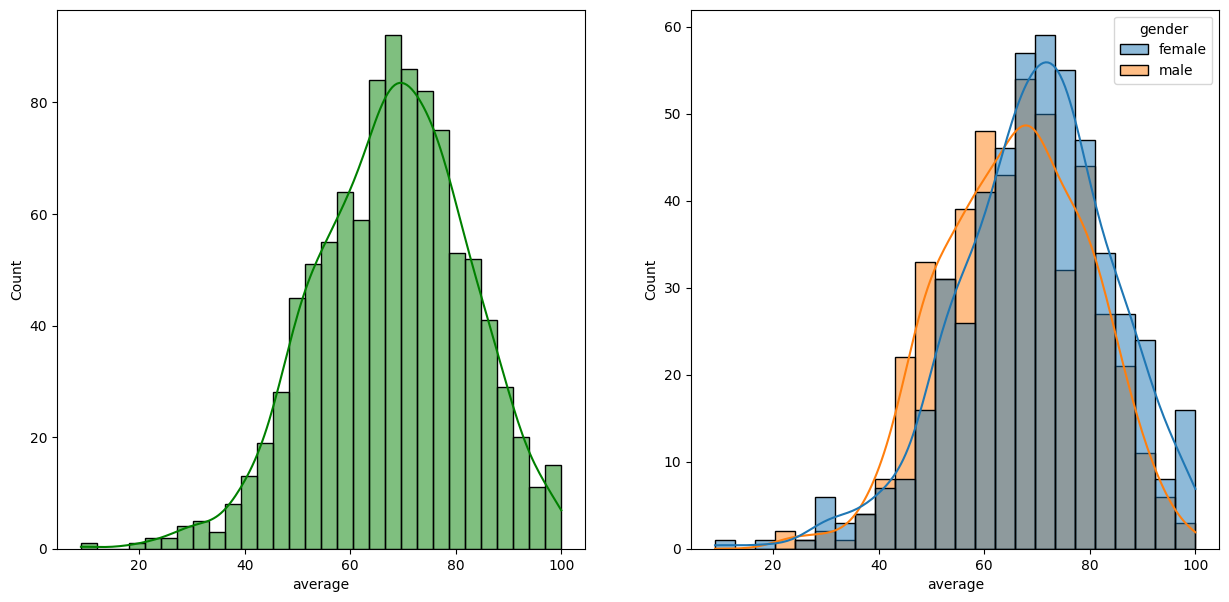

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

<Axes: xlabel='total score', ylabel='Count'>

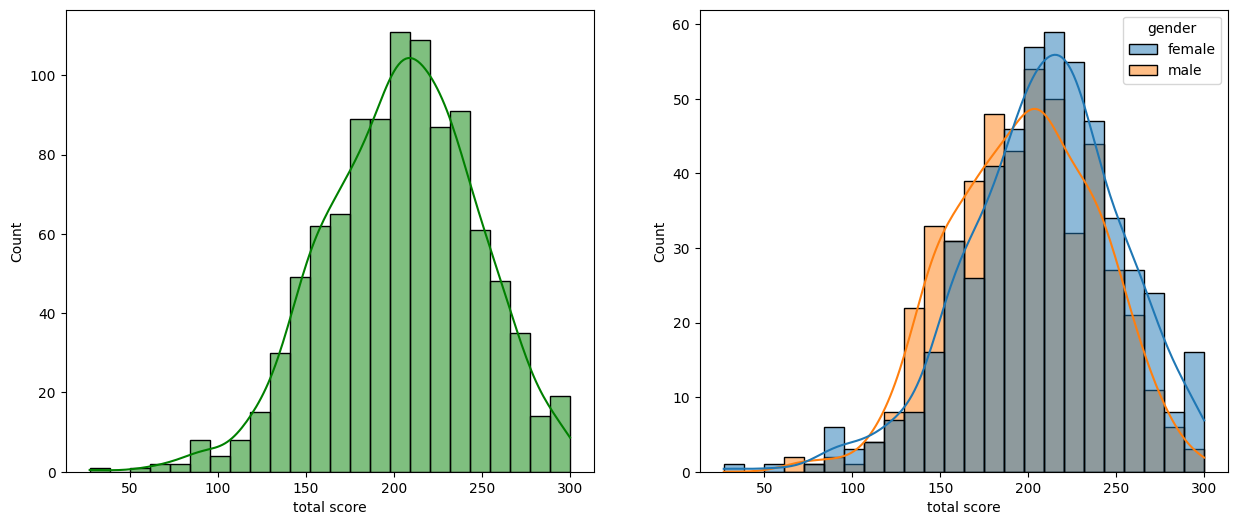

In [15]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
sns.histplot(data=df,x='total score',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')

insights: Female students perform better than boys

is lunch is helful for exams or not ?

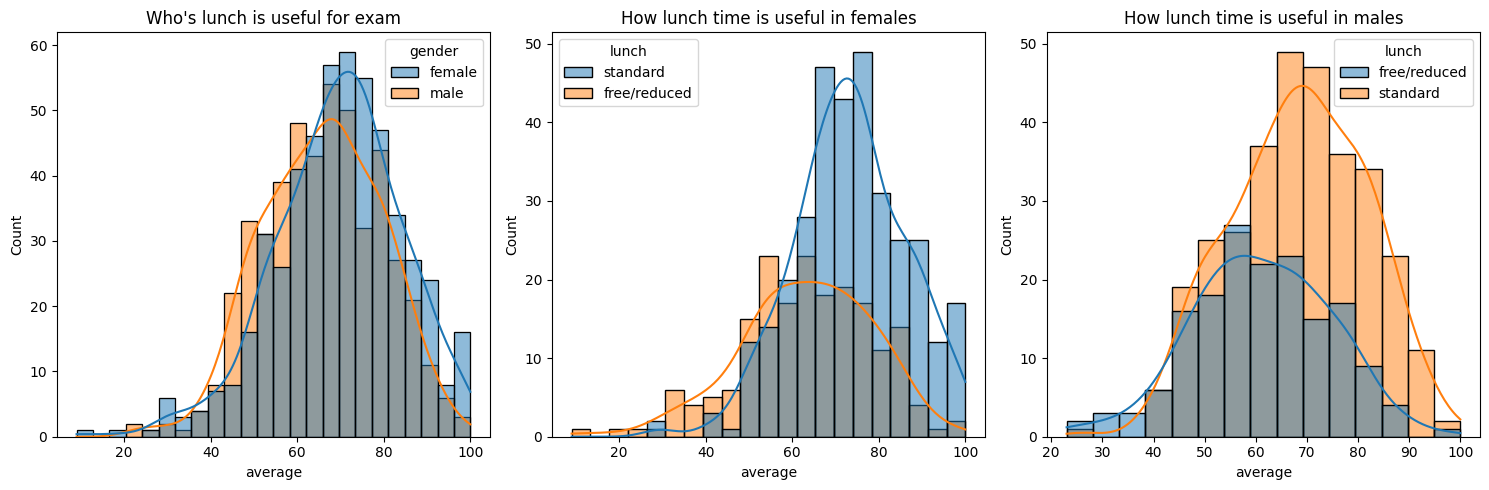

In [16]:


# Create a figure with 3 subplots arranged in 1 row and 3 columns
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Distribution of 'average' with respect to gender
ax[0].set_title("Who's lunch is useful for exam")
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=ax[0])

# Plot 2: Distribution of 'average' for females with respect to lunch
ax[1].set_title('How lunch time is useful in females')
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch', ax=ax[1])

# Plot 3: Distribution of 'average' for males with respect to lunch
ax[2].set_title('How lunch time is useful in males')
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch', ax=ax[2])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


insights: 

1.standard lunch is helpful both male and female.

2.boys toppers utilize the standlunch time efficientlly(marks 65 to 100)

parent level education is it useful for students again the marks 

C:\Users\VIJAY\AppData\Local\Temp\ipykernel_8760\2655095252.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


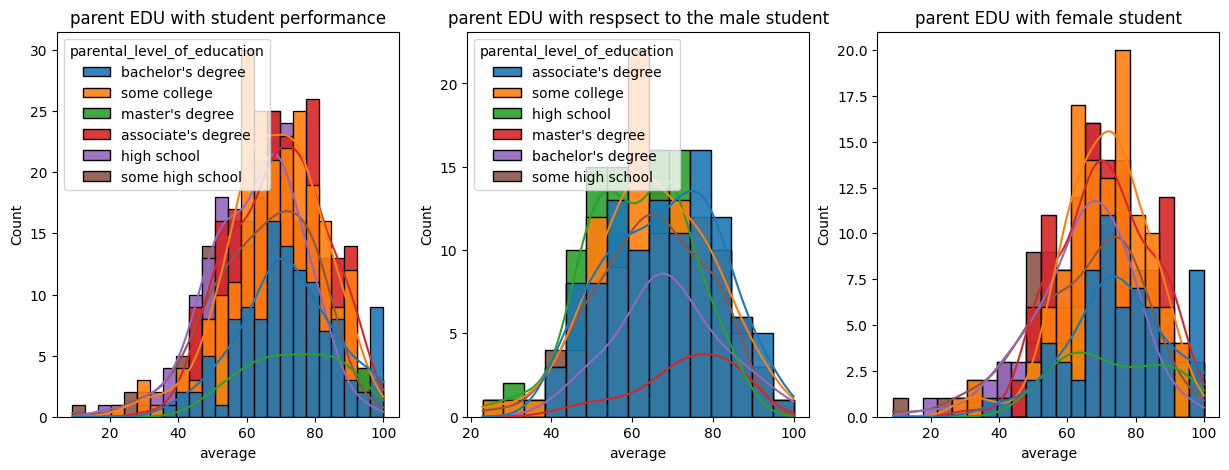

In [17]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].set_title("parent EDU with student performance")
sns.histplot(data=df,x="average",hue="parental_level_of_education",kde=True,ax=ax[0],alpha=0.9)
ax[1].set_title("parent EDU with respsect to the male student")
sns.histplot(data=df[df.gender=="male"],x="average",kde=True,ax=ax[1],hue="parental_level_of_education",alpha=0.9)
ax[2].set_title("parent EDU with female student")
sns.histplot(data=df[df.gender=="female"],x="average",kde=True,ax=ax[2],hue="parental_level_of_education",alpha=0.9)
plt.legend(frameon=False)

In general, a parent's education doesn't significantly help a student perform well in exams. 

- The second plot shows that parents with an associate's or master's degree tend to have male children who perform better in exams.
- The third plot reveals that there is no noticeable effect of a parent's education on female students' performance.


C:\Users\VIJAY\AppData\Local\Temp\ipykernel_8760\1956345413.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


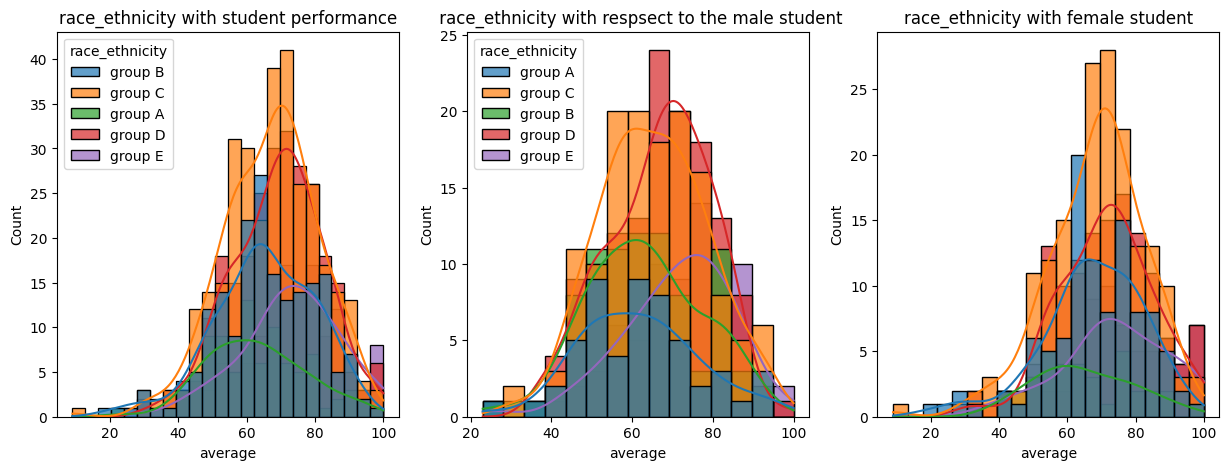

In [18]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].set_title("race_ethnicity with student performance")
sns.histplot(data=df,x="average",hue="race_ethnicity",kde=True,ax=ax[0],alpha=0.7)
ax[1].set_title(" race_ethnicity with respsect to the male student")
sns.histplot(data=df[df.gender=="male"],x="average",kde=True,ax=ax[1],hue="race_ethnicity",alpha=0.7)
ax[2].set_title("race_ethnicity with female student")
sns.histplot(data=df[df.gender=="female"],x="average",kde=True,ax=ax[2],hue="race_ethnicity",alpha=0.7)
plt.legend(frameon=False)

### Insights
- Students in group A and group B tend to perform poorly in exams.
- This trend holds regardless of whether the student is male or female.


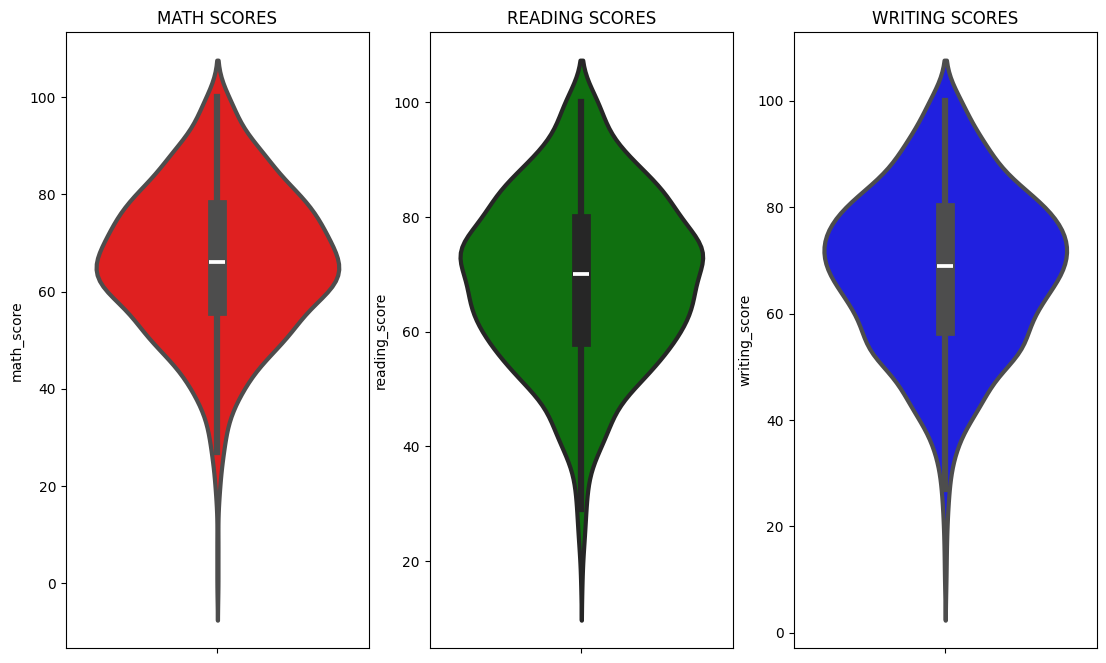

In [19]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

## Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

In [22]:
df.nunique()

gender                           2
race_ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
math_score                      81
reading_score                   72
writing_score                   77
total score                    194
average                        194
dtype: int64